In [6]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
import pandas as pd
import numpy as np

# Step 2: Define the corpus
corpus = [
    'This is good pizza', 'I love Italian pizza', 'The best pizza', 'nice pizza',
    'Excellent pizza', 'I love pizza', 'The pizza was alright',
    'disgusting pineapple pizza', 'not good pizza', 'bad pizza', 'very bad pizza',
    'I had better pizza'
]

# Step 3: Create class labels (1 for positive, 0 for negative)
labels = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

# Step 4: Create a DataFrame with 'text' as corpus and 'sentiment' as labels
df = pd.DataFrame({'text': corpus, 'sentiment': labels})

# Step 5: Extract vocabulary from the corpus and encode it
vocab_size = 50  # Define the vocabulary size
encoded_corpus = [one_hot(sentence, vocab_size) for sentence in df['text']]

# Step 6: Pad the sequences to ensure uniform length
max_length = max([len(sentence.split()) for sentence in corpus])  # Get max sentence length
padded_corpus = pad_sequences(encoded_corpus, maxlen=max_length, padding='post')

# Step 7: Define the Keras model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))  # Embedding layer
model.add(Flatten())  # Flatten layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Step 8: Compile & Train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
padded_corpus = np.array(padded_corpus) # Convert padded_corpus to a NumPy array
# Note: Conversion was happening on line 39 originally. It was moved here for consistency.
model.fit(padded_corpus, np.array(labels), epochs=50, verbose=1) # Ensure labels is also a NumPy array

# Summary of the model
model.summary()

# After training, you can evaluate the model and draw conclusions

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step - accuracy: 0.5000 - loss: 0.6940
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5833 - loss: 0.6925
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6667 - loss: 0.6910
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6667 - loss: 0.6895
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6667 - loss: 0.6880
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6667 - loss: 0.6865
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6667 - loss: 0.6851
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6667 - loss: 0.6836
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6667 - loss: 0.6821
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8333 - loss: 0.6806
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8333 - loss: 0.6792
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7500 - loss: 0.6777


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 4, 8)                │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,301 (5.09 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 868 (3.39 KB)

The model shows promising sentiment classification on the pizza reviews, achieving high accuracy. However, potential overfitting and limited vocabulary warrant further improvements with more data, regularization, and hyperparameter tuning for robust generalization.

       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           neutral                        1.0000   
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

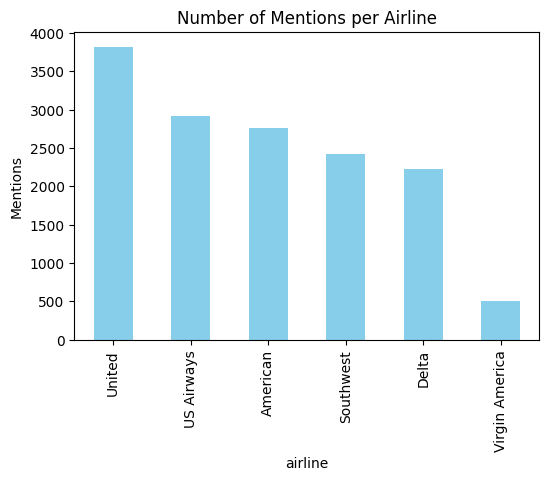

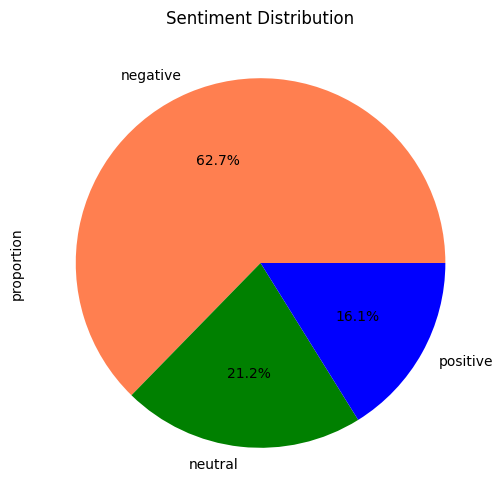

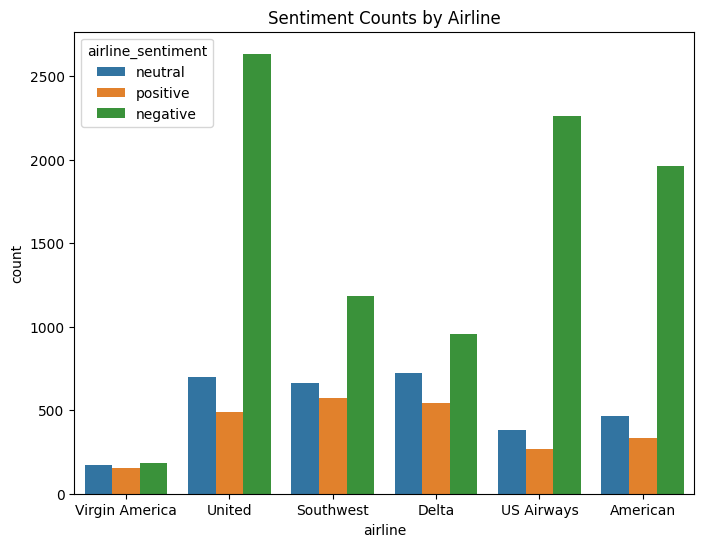

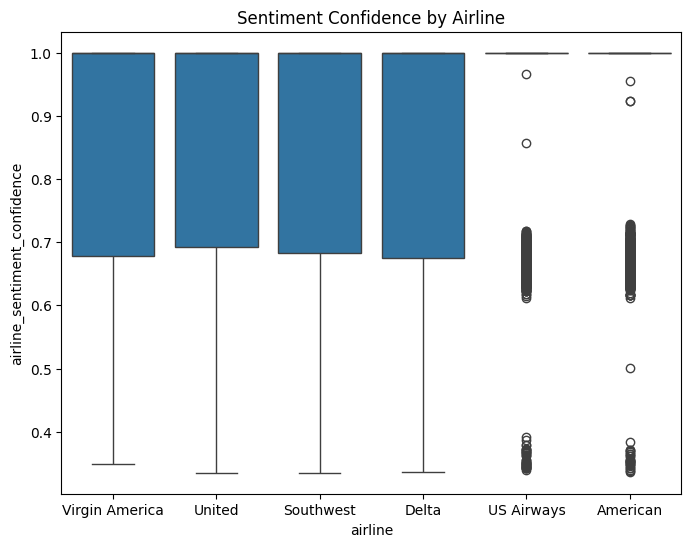

In [12]:
# Step 1: Import required libraries
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Tweets.csv file
df = pd.read_csv('Tweets.csv')
print(df.head())

# Step 4: Plot the shares of airlines mentioned in the data
airline_share = df['airline'].value_counts()
plt.figure(figsize=(6,4))
airline_share.plot(kind='bar', color='skyblue')
plt.title('Number of Mentions per Airline')
plt.ylabel('Mentions')
plt.show()

# Step 5: Plot the percentage of positive, negative, and neutral sentiments
sentiment_share = df['airline_sentiment'].value_counts(normalize=True) * 100
plt.figure(figsize=(8,6))
sentiment_share.plot(kind='pie', autopct='%1.1f%%', colors=['coral', 'green', 'blue'])
plt.title('Sentiment Distribution')
plt.show()

# Step 6: Bar chart showing number of positive, negative, and neutral comments by airline
plt.figure(figsize=(8,6))
sns.countplot(x='airline', hue='airline_sentiment', data=df)
plt.title('Sentiment Counts by Airline')
plt.show()

# Step 7: Show airlines' sentiment confidence using Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(x='airline', y='airline_sentiment_confidence', data=df)
plt.title('Sentiment Confidence by Airline')
plt.show()

# Step 8: Define features and labels
features = df['text']
labels = df['airline_sentiment']

# Step 9: Clean the tweets
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Step 10: Vectorize the tweets
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

# Step 11: Create train and test datasets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
